<a href="https://colab.research.google.com/github/Praxis-QR/PythonForManagers/blob/main/Sharemarket_Technical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png)<br>
<hr>

![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/YantraJaalBanner.png)<br>


<hr>

[Prithwis Mukerjee](http://www.linkedin.com/in/prithwis)<br>

In [23]:
from datetime import datetime
import pytz
print("\033[1m"+'ॐ श्री गणेशाय नमः'+"\033[0m")
print('Tested on ',datetime.now(pytz.timezone('Asia/Calcutta')))

ॐ श्री गणेशाय नमः
Tested on  2024-06-05 10:35:23.498853+05:30


#Analysis of NSE data <br>
What is a stock? Why is it important? [Read here](https://docs.google.com/presentation/d/1eRLBw2ATwJSa8qFu0YUUNIayAL2Mogm-Q6LljTHM4S4/edit?usp=sharing) <br>
NSE Data is available here #NSE Data is available at https://www.nseindia.com/products/content/equities/equities/eq_security.htm <br> For symbols like BHARTIARTL, LT, HULV, HDFC etc <br>
![alt text](https://github.com/Praxis-QR/FDS/raw/main/images/NSEHistoricData.png)<br>






# Setup

## Load Pandas

In [24]:
import pandas as pd

##Get Data

In [25]:
#NSE Data is available at https://www.nseindia.com/products/content/equities/equities/eq_security.htm
#Sample Data on four companies are available here
!wget -q -O bharartl.csv 'https://github.com/Praxis-QR/PythonForManagers/raw/main/Data/NSE_01-01-2020-TO-31-12-2020BHARTIARTLEQN.csv' # Bharti Airtel
!wget -q -O hindlevr.csv 'https://github.com/Praxis-QR/PythonForManagers/raw/main/Data/NSE_01-01-2020-TO-31-12-2020HINDUNILVREQN.csv' # Hindustan Unilever
!wget -q -O larsento.csv 'https://github.com/Praxis-QR/PythonForManagers/raw/main/Data/NSE_01-01-2020-TO-31-12-2020LTEQN.csv' # Larsen Toubro
!wget -q -O reliance.csv 'https://github.com/Praxis-QR/PythonForManagers/raw/main/Data/NSE_01-01-2020-TO-31-12-2020RELIANCEEQN.csv' # Reliance Ind

In [26]:
df = pd.read_csv('bharartl.csv')
df.head(3)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
0,BHARTIARTL,EQ,01-Jan-2020,455.8,456.05,460.5,449.75,453.70,453.3,454.52,5059995,2.299887e+09,67334
1,BHARTIARTL,EQ,02-Jan-2020,453.3,454.10,459.4,453.50,455.30,455.2,455.54,4842142,2.205787e+09,78890
2,BHARTIARTL,EQ,03-Jan-2020,455.2,455.70,459.2,451.50,457.15,455.1,454.80,5059594,2.301088e+09,97228


#Basic Charts

### Rearrange Data

In [27]:
# Read data from CSV file to pandas dataframe
df = pd.read_csv('hindlevr.csv')

# Drop columns that are not required
#list(df.columns)
dropColumns = ['Symbol', 'Series', 'Prev Close', 'Last Price', 'Average Price', 'Turnover', 'No. of Trades']
df.drop(dropColumns, axis=1, inplace=True)

# Rename columns
df.rename(columns ={'Open Price':'Open','High Price':'High','Low Price':'Low','Close Price':'Close','Total Traded Quantity':'Volume'}, inplace =True)

# Convert date column to pandas date format
df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index of the dataframe
df.set_index('Date',inplace=True)

df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-01,1930.00,1939.9,1918.00,1936.55,543035
2020-01-02,1940.00,1952.6,1930.00,1938.05,663275
2020-01-03,1937.90,1940.0,1918.75,1927.45,1598825
2020-01-06,1927.35,1929.4,1911.25,1915.45,683129
2020-01-07,1919.25,1931.0,1918.00,1920.70,808935


## Simple Chart for Single Company

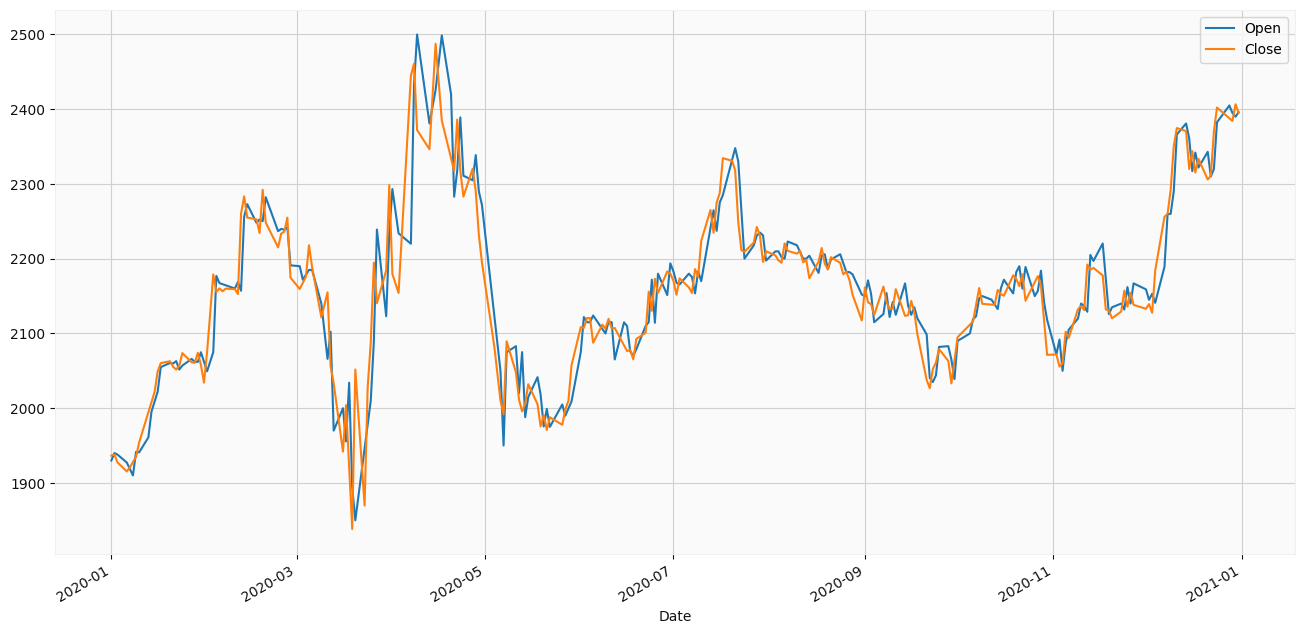

In [28]:
df.plot(y=['Open','Close'], figsize = (16,8));

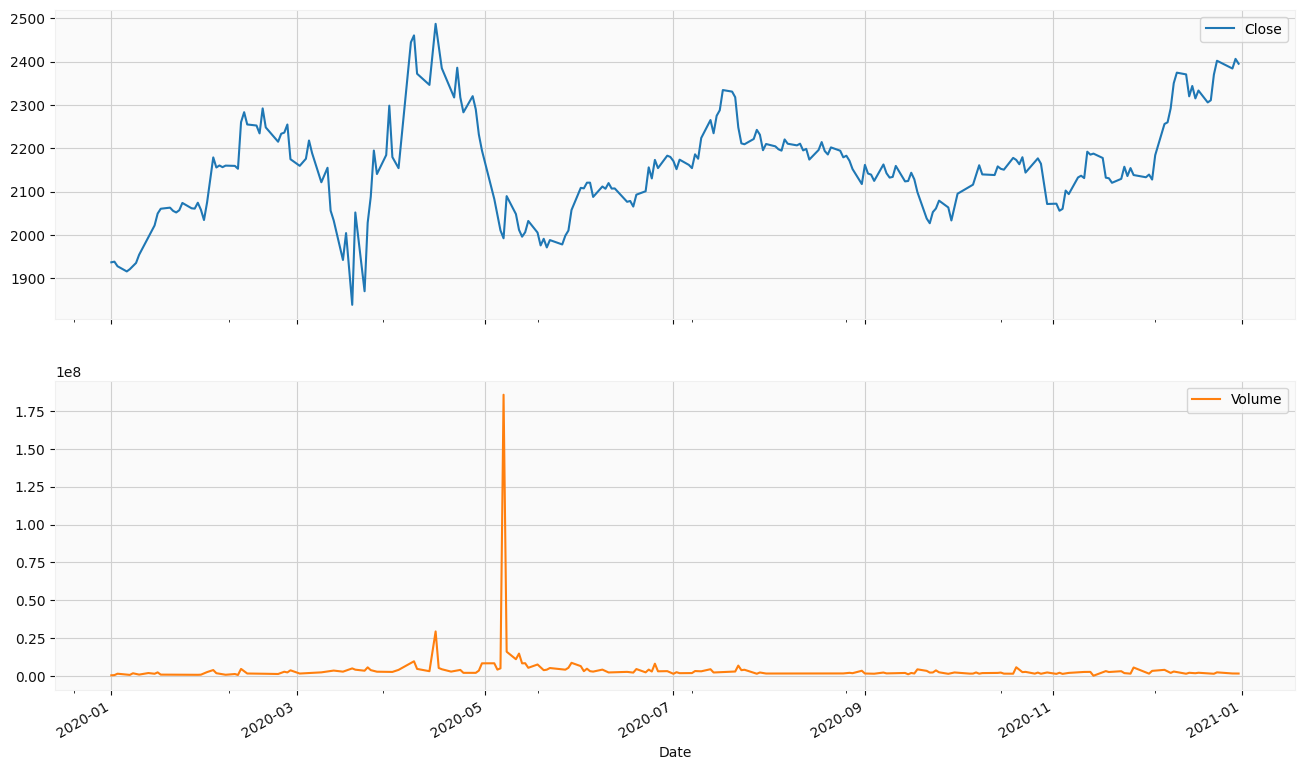

In [29]:
df.plot(y=['Close','Volume'], figsize = (16,10), subplots=True);

##Comparing Multiple Companies

In [30]:
# Define a function to read data from a CSV file and rearrange it for charts
# This function is good for NSE data. For BSE data this function has to be modified to reflect state of data
#
def NSEData(fileName, stkID):
    # filename = name of CSV file
    # stkID = abbreviated name of company
    #
    df = pd.read_csv(fileName)
    #list(df.columns)
    dropColumns = ['Symbol', 'Series', 'Prev Close','Open Price','High Price','Low Price', 'Last Price', 'Average Price', 'Turnover', 'No. of Trades','Total Traded Quantity']
    df.drop(dropColumns, axis=1, inplace=True)
    df.rename(columns ={'Close Price':stkID}, inplace =True)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date',inplace=True)
    return df

In [31]:
# Create dataframe for one specific company
#
dfAIR = NSEData('bharartl.csv','AIR')
dfAIR.head()

,AIR
Date,
2020-01-01,453.30
2020-01-02,455.20
2020-01-03,455.10
2020-01-06,449.65
2020-01-07,445.10


In [32]:
# Create data for three other companies
dfHUL = NSEData('hindlevr.csv','HUL')
dfLNT = NSEData('larsento.csv','LNT')
dfREL = NSEData('reliance.csv','REL')

In [33]:
# Merge ( of 'JOIN' ) data for two companies
#
df = pd.merge(dfAIR,dfHUL, on='Date')
df.head()

,AIR,HUL
Date,,
2020-01-01,453.30,1936.55
2020-01-02,455.20,1938.05
2020-01-03,455.10,1927.45
2020-01-06,449.65,1915.45
2020-01-07,445.10,1920.70


In [34]:
# Merge ( of 'JOIN' ) data for four companies
#
df = pd.merge(dfAIR,pd.merge(dfHUL,pd.merge(dfLNT,dfREL,on='Date'),on='Date'), on='Date')
df.head()

,AIR,HUL,LNT,REL
Date,,,,
2020-01-01,453.30,1936.55,1309.95,1509.60
2020-01-02,455.20,1938.05,1345.30,1535.30
2020-01-03,455.10,1927.45,1335.05,1537.15
2020-01-06,449.65,1915.45,1316.75,1501.50
2020-01-07,445.10,1920.70,1320.50,1524.60


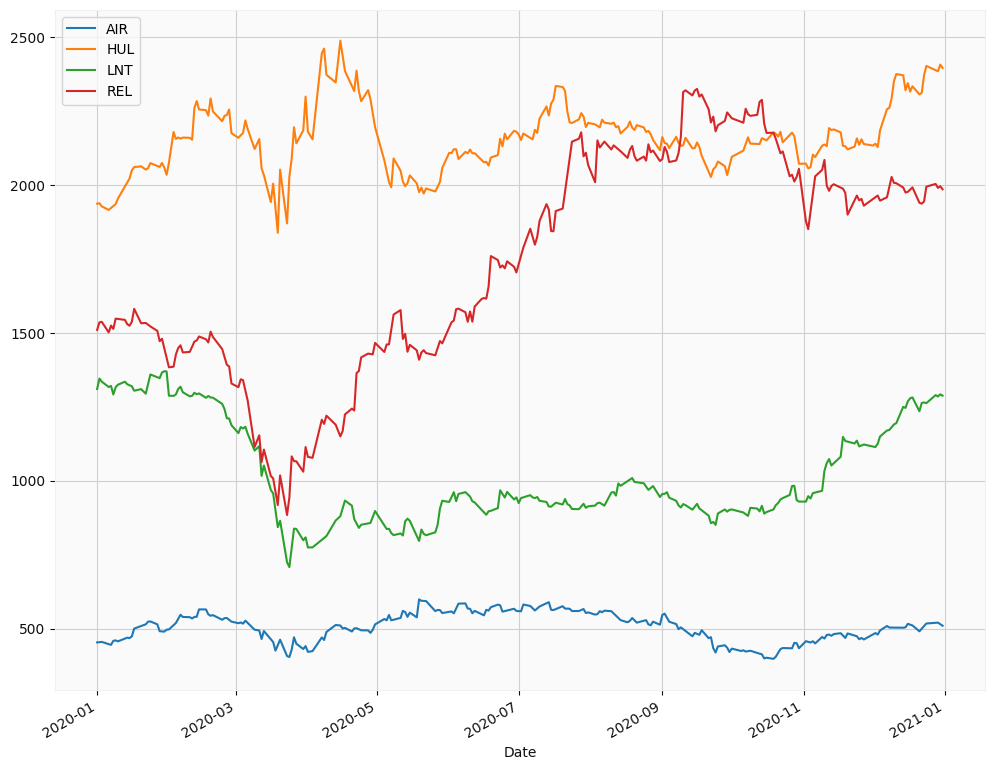

In [35]:
# Plot closing price data for four companies
#
df.plot(figsize = (12,10));

##Scaling Data for Clarity
To get a better idea of which share has shown best performance, we scale the price by setting the starting price at 1

In [36]:
df['AIR'] = df['AIR']/df['AIR'][0]
df['HUL'] = df['HUL']/df['HUL'][0]
df['LNT'] = df['LNT']/df['LNT'][0]
df['REL'] = df['REL']/df['REL'][0]
df.head()

,AIR,HUL,LNT,REL
Date,,,,
2020-01-01,1.000000,1.000000,1.000000,1.000000
2020-01-02,1.004191,1.000775,1.026986,1.017024
2020-01-03,1.003971,0.995301,1.019161,1.018250
2020-01-06,0.991948,0.989104,1.005191,0.994634
2020-01-07,0.981910,0.991815,1.008054,1.009936


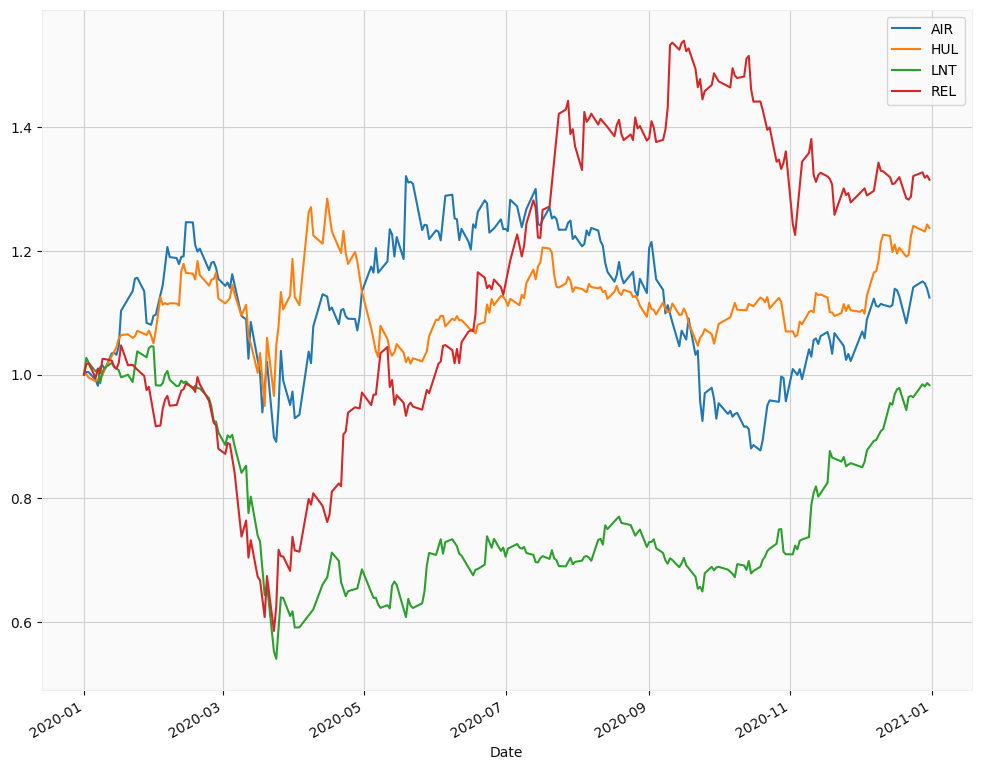

In [37]:
df.plot(figsize = (12,10));

#Basic Technical Analysis
Pandas can create basic charts but for more specialised charts, we need to install and load specialist finance modules

In [38]:
!pip install mplfinance > /dev/null
import mplfinance as mpf

## Reload data for one company

In [39]:
# Read data from CSV file to pandas dataframe
df = pd.read_csv('hindlevr.csv')

# Drop columns that are not required
#list(df.columns)
dropColumns = ['Symbol', 'Series', 'Prev Close', 'Last Price', 'Average Price', 'Turnover', 'No. of Trades']
df.drop(dropColumns, axis=1, inplace=True)

# Rename columns
df.rename(columns ={'Open Price':'Open','High Price':'High','Low Price':'Low','Close Price':'Close','Total Traded Quantity':'Volume'}, inplace =True)

# Convert date column to pandas date format
df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index of the dataframe
df.set_index('Date',inplace=True)

df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-01,1930.00,1939.9,1918.00,1936.55,543035
2020-01-02,1940.00,1952.6,1930.00,1938.05,663275
2020-01-03,1937.90,1940.0,1918.75,1927.45,1598825
2020-01-06,1927.35,1929.4,1911.25,1915.45,683129
2020-01-07,1919.25,1931.0,1918.00,1920.70,808935


## Create Technical Charts

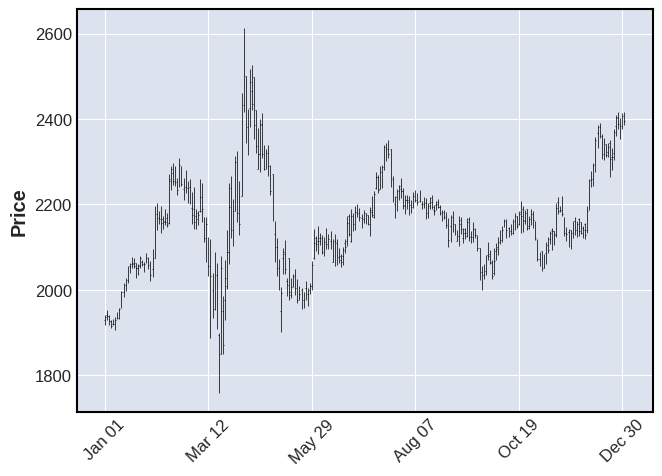

In [40]:
#very basic usage
mpf.plot(df)

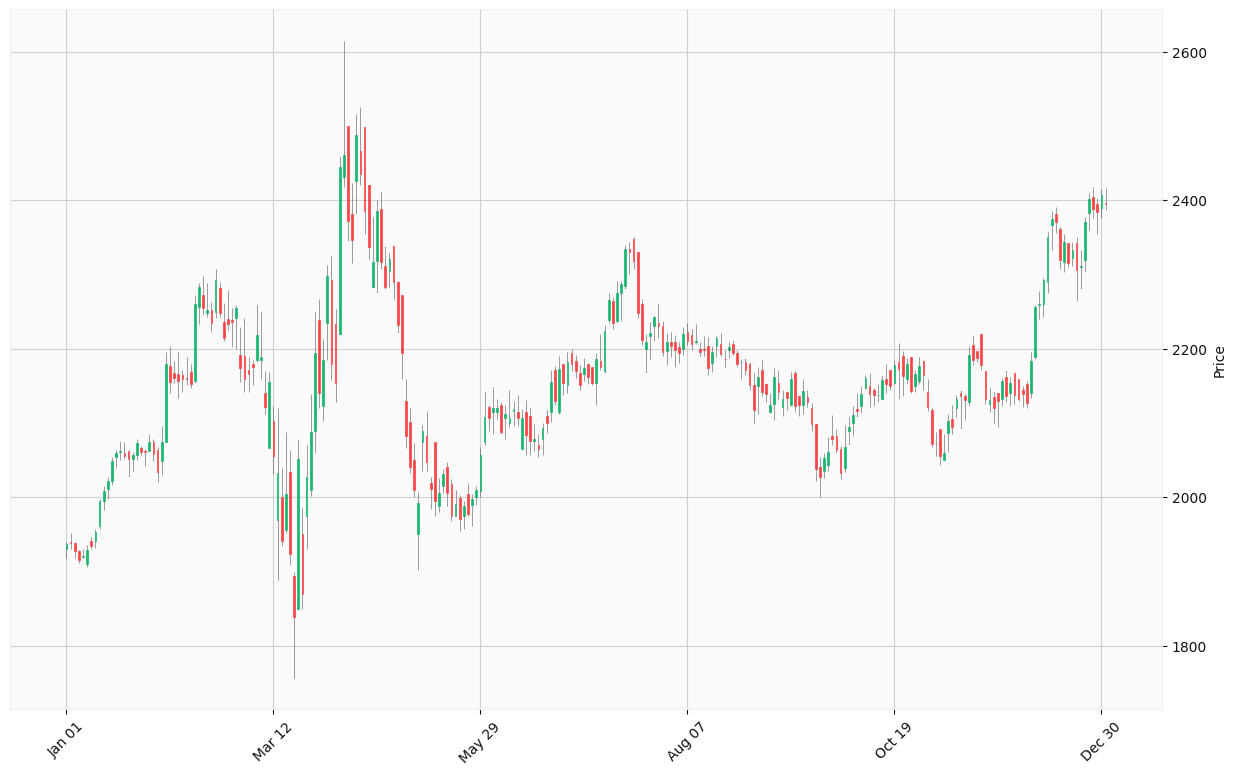

In [41]:
# Use the popular candle charts
mpf.plot(df, type='candle',style='yahoo', figsize = (16,10))

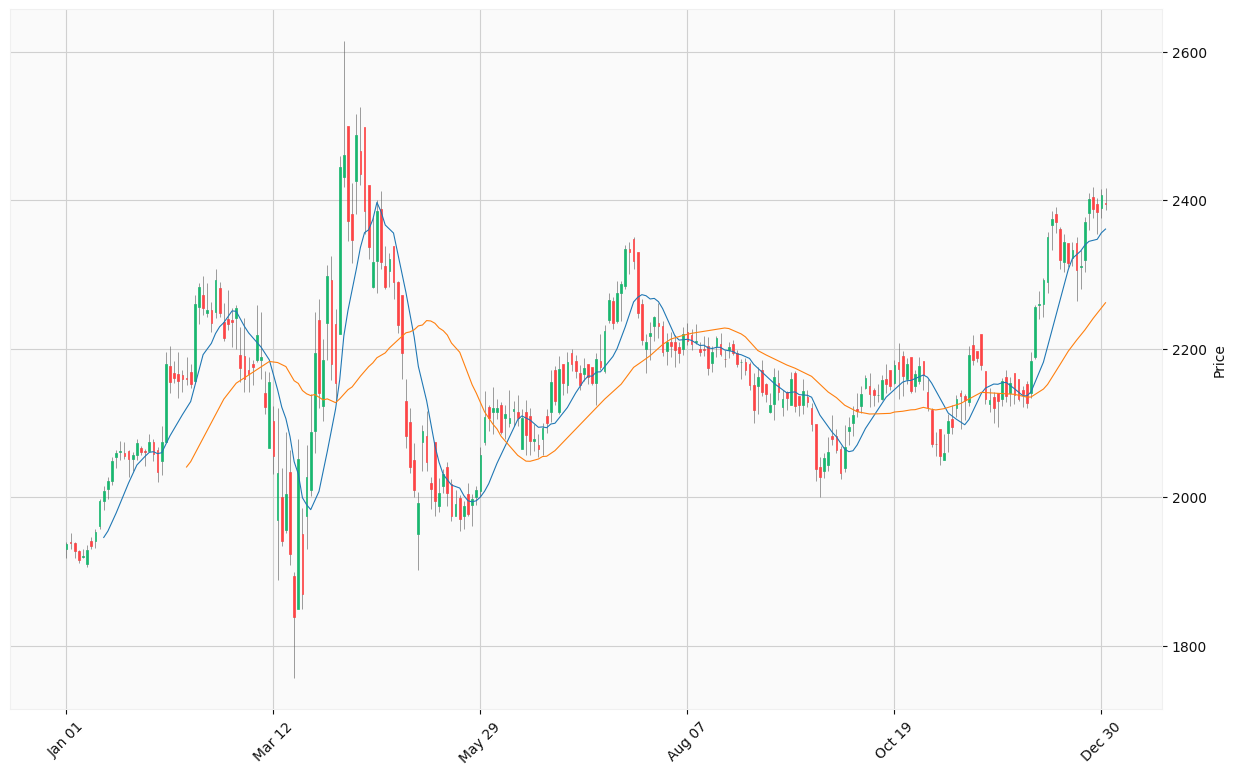

In [42]:
# Add additional features like Moving Averge (mav) of 10, 30 days
mpf.plot(df, type='candle',style='yahoo', mav=(10,30),figsize = (16,10))

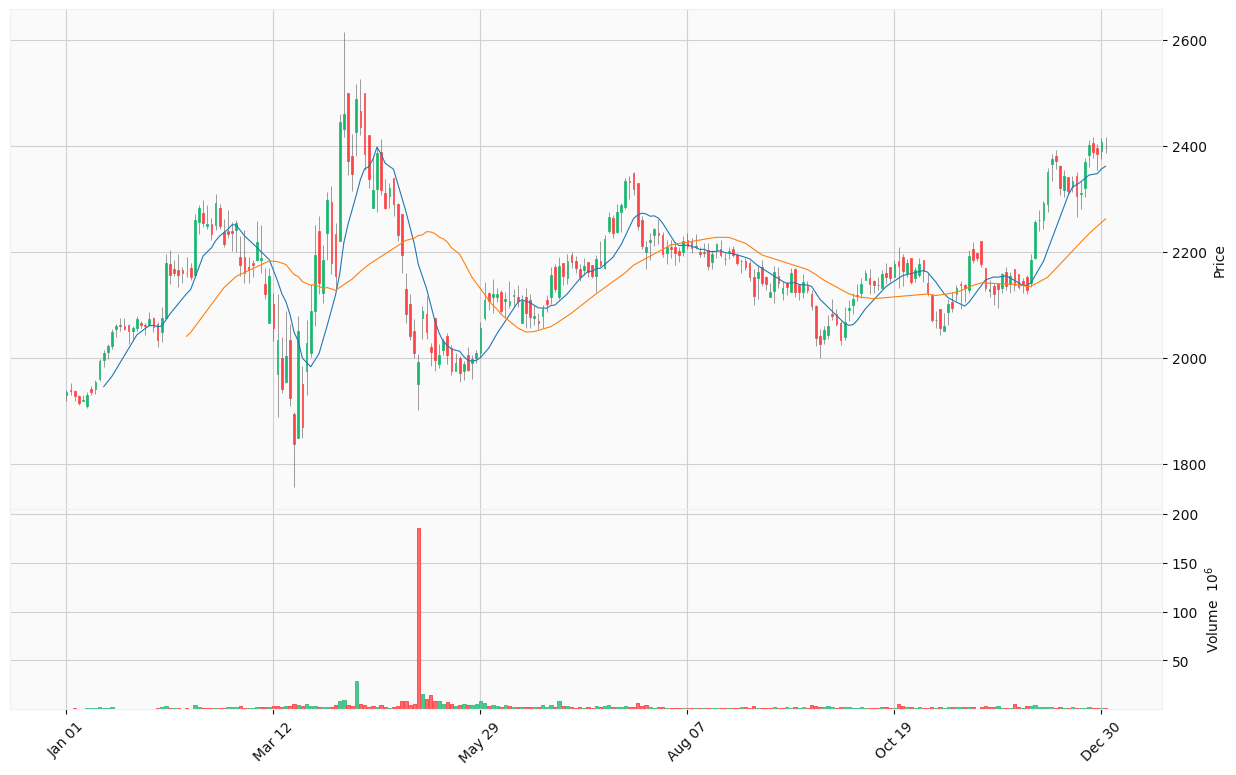

In [43]:
# Add Volume data
#
mpf.plot(df, type='candle',style='yahoo', mav=(10,30), volume =True,figsize = (16,10))

In [44]:
# Checking the number of datapoints in the dataframe
#
len(df. index)

252

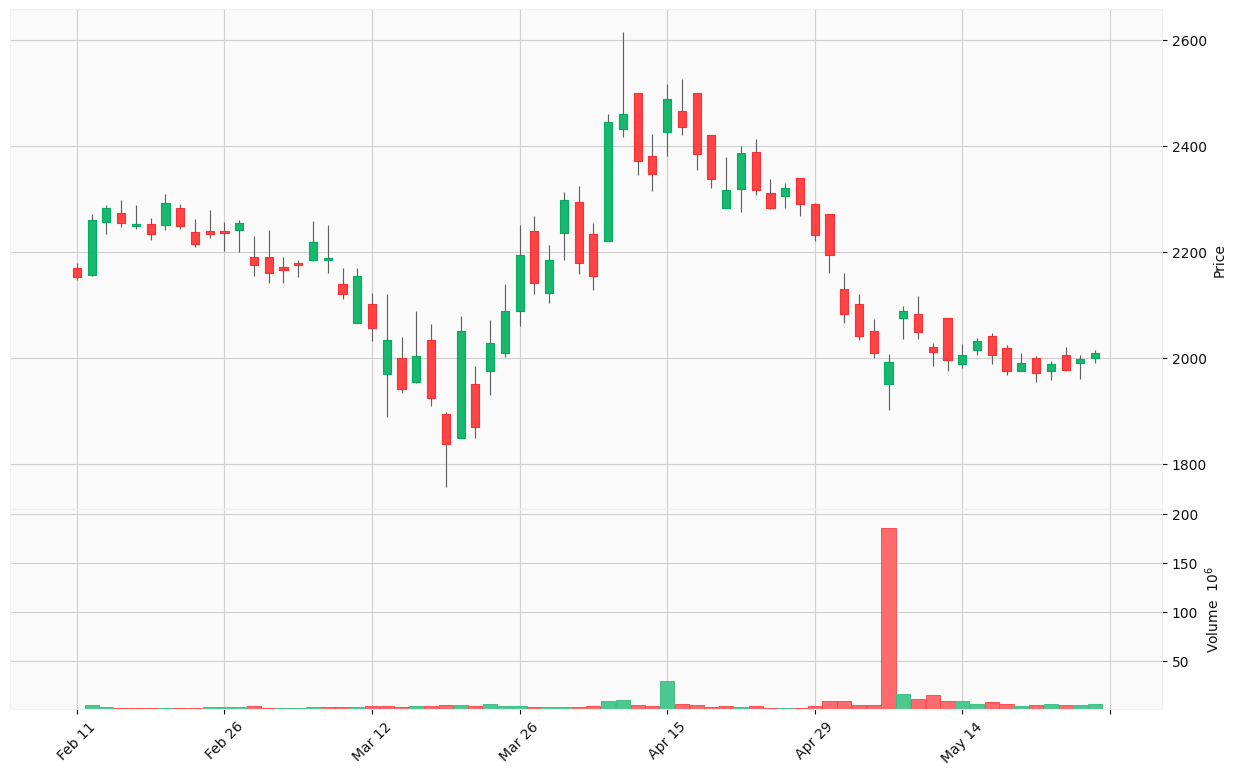

In [45]:
# Plotting from point 30 to 100, for clarity
#
mpf.plot(df.iloc[30:100,:], type='candle',style='yahoo',  volume =True,figsize = (16,10))

#BSE Data
 BSE Site BSE Historical Data is available at https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.html?flag=0 <br>

![alt text](https://github.com/Praxis-QR/FDS/raw/main/images/BSEHistoricData.png)<br>
get the data for three other companies and perform the same analysis

#Chronobooks <br>
Two science fiction novels by Prithwis Mukerjee. A dystopian Earth. A technocratic society managed by artificial intelligence. Escape and epiphany on Mars. Can man and machine, carbon and silicon explore and escape into other dimensions of existence? An Indic perspective rooted in Advaita Vedanta and the Divine Feminine.  [More information](http://bit.ly/chronobooks) <br>
![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/CTCYFooter-1.png)